# Day 16

## Part 1

With the beam of light completely focused somewhere, the reindeer leads you deeper still into the Lava Production Facility. At some point, you realize that the steel facility walls have been replaced with cave, and the doorways are just cave, and the floor is cave, and you're pretty sure this is actually just a giant cave.

Finally, as you approach what must be the heart of the mountain, you see a bright light in a cavern up ahead. There, you discover that the beam of light you so carefully focused is emerging from the cavern wall closest to the facility and pouring all of its energy into a contraption on the opposite side.

Upon closer inspection, the contraption appears to be a flat, two-dimensional square grid containing empty space (.), mirrors (/ and \), and splitters (| and -).

The contraption is aligned so that most of the beam bounces around the grid, but each tile on the grid converts some of the beam's light into heat to melt the rock in the cavern.

You note the layout of the contraption (your puzzle input). For example:

```
.|...\....
|.-.\.....
.....|-...
........|.
..........
.........\
..../.\\..
.-.-/..|..
.|....-|.\
..//.|....
```
The beam enters in the top-left corner from the left and heading to the right. Then, its behavior depends on what it encounters as it moves:

- If the beam encounters empty space (.), it continues in the same direction.
- If the beam encounters a mirror (/ or \), the beam is reflected 90 degrees depending on the angle of the mirror. For instance, a rightward-moving beam that encounters a / mirror would continue upward in the mirror's column, while a rightward-moving beam that encounters a \ mirror would continue downward from the mirror's column.
- If the beam encounters the pointy end of a splitter (| or -), the beam passes through the splitter as if the splitter were empty space. For instance, a rightward-moving beam that encounters a - splitter would continue in the same direction.
- If the beam encounters the flat side of a splitter (| or -), the beam is split into two beams going in each of the two directions the splitter's pointy ends are pointing. For instance, a rightward-moving beam that encounters a | splitter would split into two beams: one that continues upward from the splitter's column and one that continues downward from the splitter's column.
- Beams do not interact with other beams; a tile can have many beams passing through it at the same time. A tile is energized if that tile has at least one beam pass through it, reflect in it, or split in it.

In the above example, here is how the beam of light bounces around the contraption:

```
>|<<<\....
|v-.\^....
.v...|->>>
.v...v^.|.
.v...v^...
.v...v^..\
.v../2\\..
<->-/vv|..
.|<<<2-|.\
.v//.|.v..
```
Beams are only shown on empty tiles; arrows indicate the direction of the beams. If a tile contains beams moving in multiple directions, the number of distinct directions is shown instead. Here is the same diagram but instead only showing whether a tile is energized (#) or not (.):

```
######....
.#...#....
.#...#####
.#...##...
.#...##...
.#...##...
.#..####..
########..
.#######..
.#...#.#..
```
Ultimately, in this example, 46 tiles become energized.

The light isn't energizing enough tiles to produce lava; to debug the contraption, you need to start by analyzing the current situation. With the beam starting in the top-left heading right, how many tiles end up being energized?

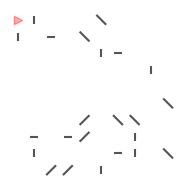

	next_moves=[]


1

In [93]:
import matplotlib.pyplot as plt
import numpy as np


class BeamMap:
    def __init__(self, input_string: str):
        self.grid = self.generate_map(input_string)
        self.steps_taken: list[tuple[tuple[int, int], str]] = []

    def plot_map(self, position: tuple[int, int], direction: str) -> None:
        direction_markers = {"L": "<", "R": ">", "U": "^", "D": "v"}
        ground_markers = {".": " ", "|": "|", "-": "_"}

        fig, ax = plt.subplots(figsize=(len(self.grid) // 5, len(self.grid[0]) // 5))
        for y, column in enumerate(self.grid):
            for x, row_value in enumerate(column):
                color = "#555"
                marker = ground_markers.get(row_value)
                # reverse y axis
                if marker:
                    ax.scatter([x], [-y], color=color, marker=marker)
                elif row_value == "/":
                    ax.plot([x - 0.25, x + 0.25], [-y - 0.25, -y + 0.25], color=color)
                elif row_value == "\\":
                    ax.plot([x - 0.25, x + 0.25], [-y + 0.25, -y - 0.25], color=color)

                # plot beam positions and current position/direction
                if (y, x) == position:
                    # triangle pointing toward the current direction
                    marker = direction_markers[direction]
                    color = "#ff000055"
                    ax.scatter([x], [-y], color=color, marker=marker)
                elif (y, x) in self.beam_positions:
                    marker = "s"
                    color = "#ff000055"
                    ax.scatter([x], [-y], color=color, marker=marker)

        ax.set_title("")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)

        plt.tight_layout()
        plt.axis("equal")
        plt.show()

    def generate_map(self, input_string: str) -> list[list[str]]:
        return [list(line) for line in input_string.splitlines()]

    def grid_value(self, position: tuple[int, int]) -> str:
        y, x = position
        return self.grid[y][x]

    @property
    def beam_positions(self) -> set[tuple[int, int]]:
        return set([position for position, _ in self.steps_taken])

    def left_position(self, position: tuple[int, int]) -> tuple[int, int] | None:
        if self.at_left_column(position):
            return None
        y, x = position
        return (y, x - 1)

    def right_position(self, position: tuple[int, int]) -> tuple[int, int] | None:
        if self.at_right_column(position):
            return None
        y, x = position
        return (y, x + 1)

    def up_position(self, position: tuple[int, int]) -> tuple[int, int] | None:
        if self.at_top_row(position):
            return None
        y, x = position
        return (y - 1, x)

    def down_position(self, position: tuple[int, int]) -> tuple[int, int] | None:
        if self.at_bottom_row(position):
            return None
        y, x = position
        return (y + 1, x)

    def at_top_row(self, position: tuple[int, int]) -> bool:
        return position[0] == 0

    def at_bottom_row(self, position: tuple[int, int]) -> bool:
        return position[0] == len(self.grid) - 1

    def at_left_column(self, position: tuple[int, int]) -> bool:
        return position[1] == 0

    def at_right_column(self, position: tuple[int, int]) -> bool:
        return position[1] == len(self.grid[position[0]]) - 1

    def available_moves(
        self,
        from_position: tuple[int, int],
        direction: str,
    ) -> list[tuple[tuple[int, int], str]]:
        position_value = self.grid_value(from_position)

        moves = []
        if position_value == "|":
            if direction in ["L", "R"]:
                # split into two vertical moves
                if up := self.up_position(from_position):
                    moves.append((up, "U"))
                if down := self.down_position(from_position):
                    moves.append((down, "D"))
            elif direction == "U":
                # pass through
                if up := self.up_position(from_position):
                    moves.append((up, "U"))
            elif direction == "D":
                # pass through
                if down := self.down_position(from_position):
                    moves.append((down, "D"))

        elif position_value == "-":
            if direction in ["U", "D"]:
                # split into two horizontal moves
                if left := self.left_position(from_position):
                    moves.append((left, "L"))
                if right := self.right_position(from_position):
                    moves.append((right, "R"))
            elif direction == "L":
                # pass through
                if left := self.left_position(from_position):
                    moves.append((left, "L"))
            elif direction == "R":
                # pass through
                if right := self.right_position(from_position):
                    moves.append((right, "R"))

        elif position_value == "/":
            if direction == "U":
                if right := self.right_position(from_position):
                    moves.append((right, "R"))
            elif direction == "R":
                if up := self.up_position(from_position):
                    moves.append((up, "U"))
            elif direction == "D":
                if left := self.left_position(from_position):
                    moves.append((left, "L"))
            elif direction == "L":
                if down := self.down_position(from_position):
                    moves.append((down, "D"))

        elif position_value == "\\":
            if direction == "U":
                if left := self.left_position(from_position):
                    moves.append((left, "L"))
            elif direction == "L":
                if up := self.up_position(from_position):
                    moves.append((up, "U"))
            elif direction == "D":
                if right := self.right_position(from_position):
                    moves.append((right, "R"))
            elif direction == "R":
                if down := self.down_position(from_position):
                    moves.append((down, "D"))

        else:
            # regular ground, no adjustments
            if direction == "U":
                if up := self.up_position(from_position):
                    moves.append((up, direction))
            elif direction == "L":
                if left := self.left_position(from_position):
                    moves.append((left, direction))
            elif direction == "D":
                if down := self.down_position(from_position):
                    moves.append((down, direction))
            elif direction == "R":
                if right := self.right_position(from_position):
                    moves.append((right, direction))

        return moves

    def move(
        self,
        from_position: tuple[int, int],
        direction: str,
        plot: bool = True,
        debug: bool = True,
    ) -> int:
        self.steps_taken.append((from_position, direction))

        current_position = from_position
        current_direction = direction

        available_moves = self.available_moves(from_position, direction)
        while available_moves:
            next_moves = []
            for to_position, new_direction in available_moves:
                if plot:
                    self.plot_map(current_position, current_direction)
                if debug:
                    print(
                        f"{current_position=} -{current_direction}-> {to_position=} ({new_direction})"
                    )

                if to_position is None:
                    continue

                if (to_position, new_direction) in self.steps_taken:
                    continue

                self.steps_taken.append((to_position, new_direction))
                current_position = to_position
                current_direction = new_direction

                next_moves += self.available_moves(to_position, new_direction)
            if debug:
                print(f"\t{next_moves=}")
            available_moves = next_moves

        return len(self.beam_positions)


test_input = open("../inputs/16_test.txt").read()
test_beam_map = BeamMap(test_input)
test_beam_map.move(
    from_position=(0, 0),
    direction="R",
)

KeyboardInterrupt: 

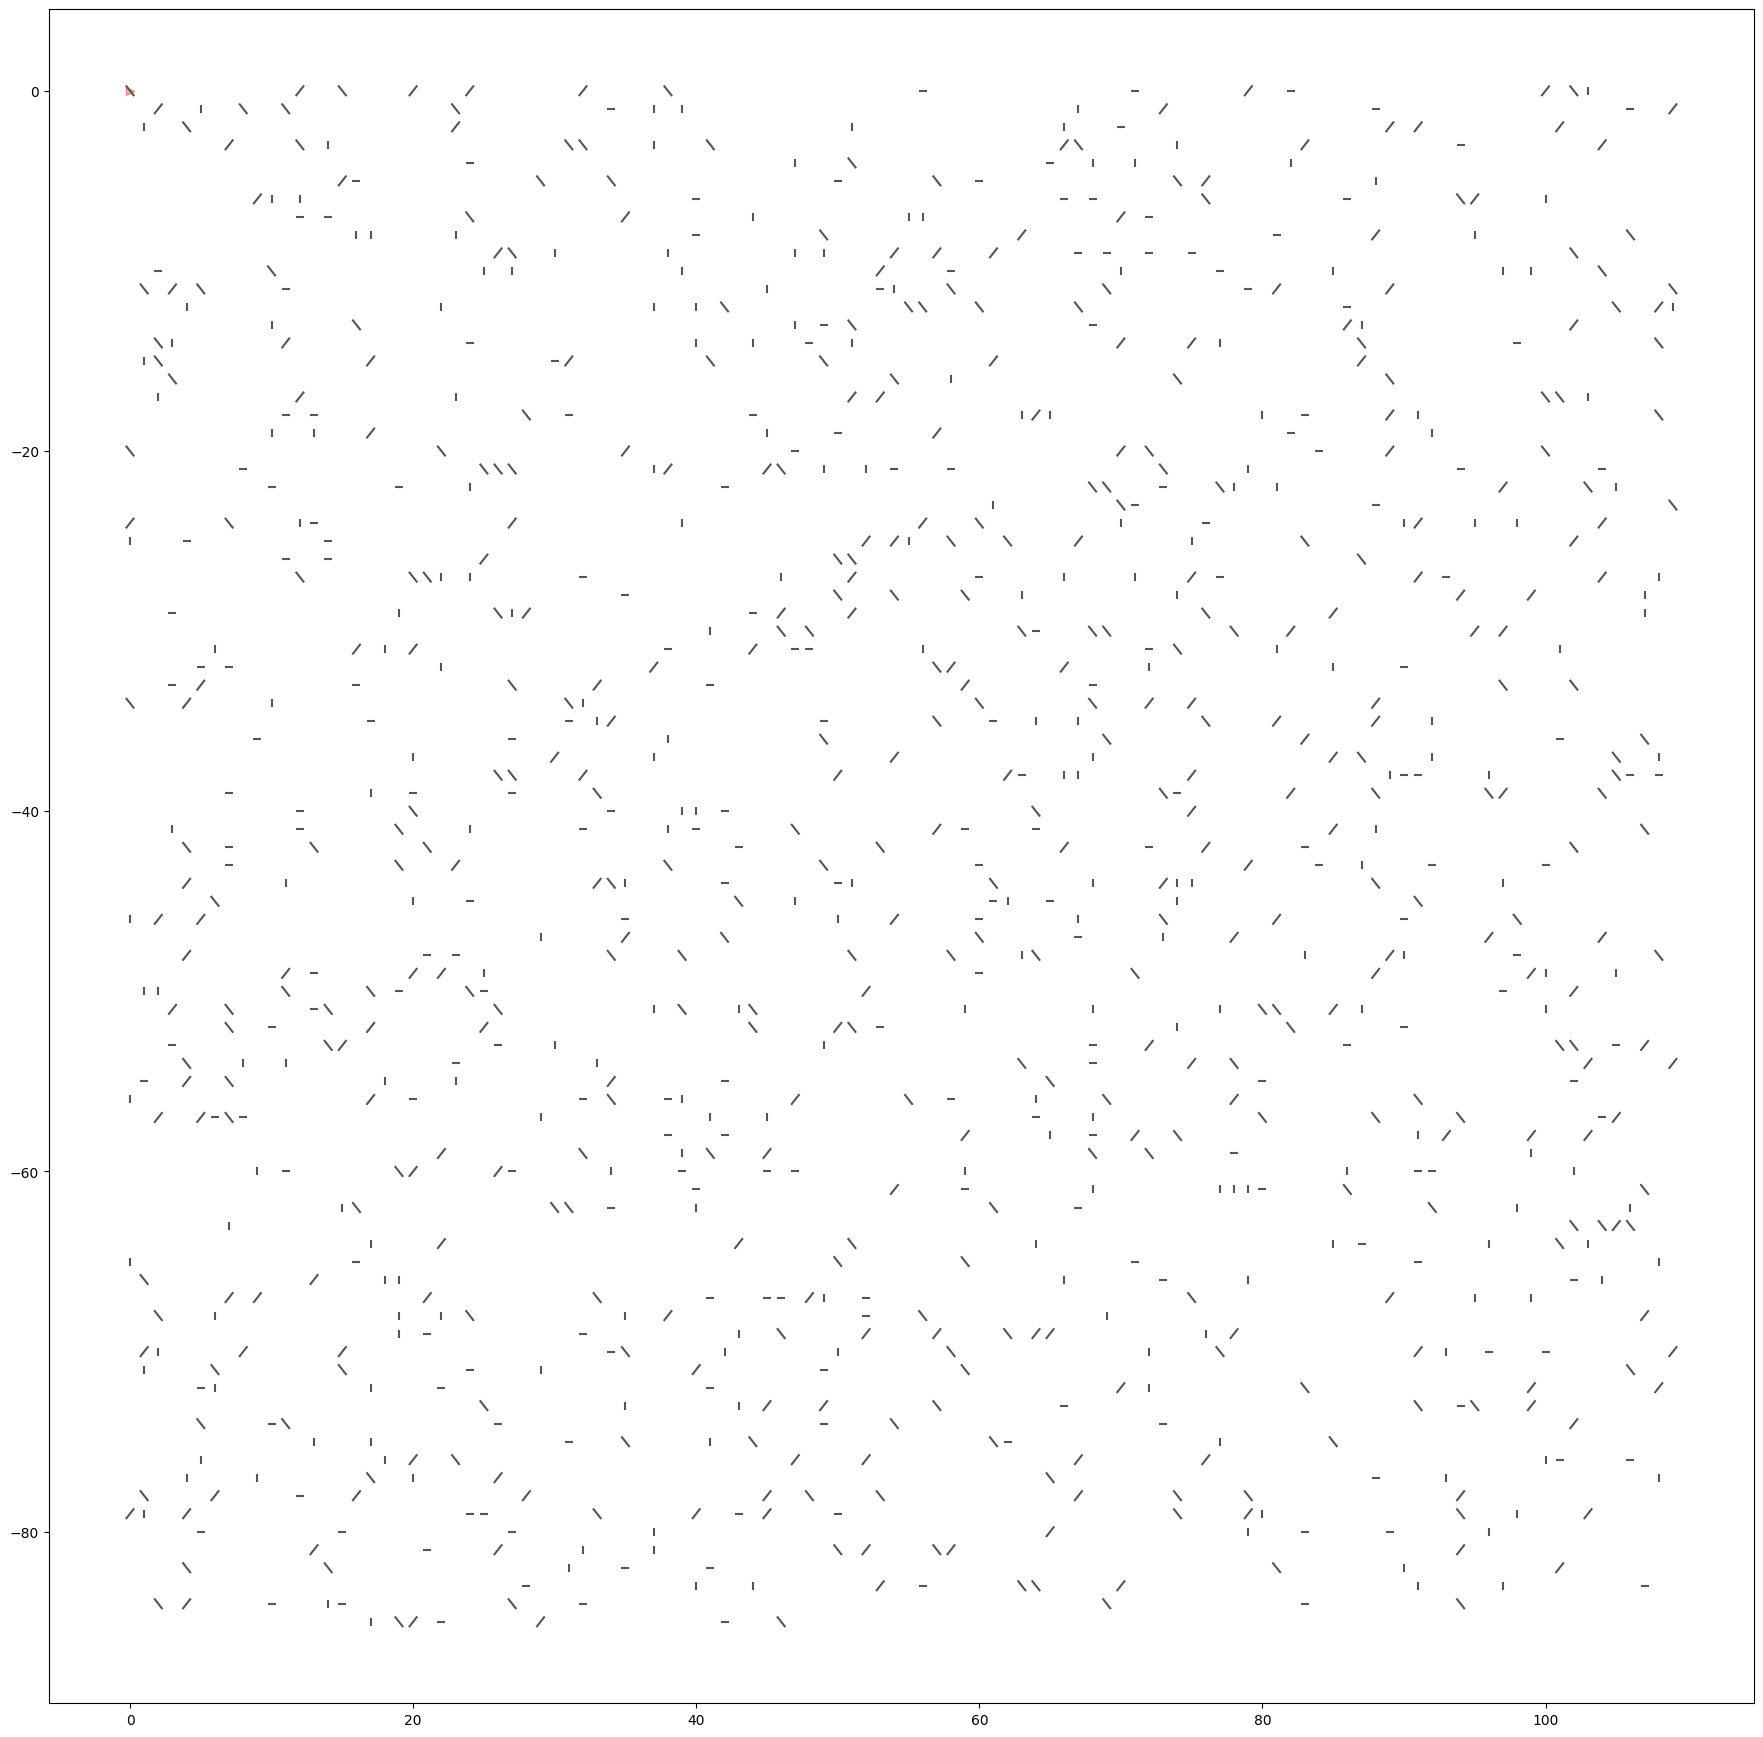

In [94]:
input_string = open("../inputs/16.txt").read()
beam_map = BeamMap(input_string)
beam_map.move(from_position=(0, 0), direction="R")

## Part 2

As you try to work out what might be wrong, the reindeer tugs on your shirt and leads you to a nearby control panel. There, a collection of buttons lets you align the contraption so that the beam enters from any edge tile and heading away from that edge. (You can choose either of two directions for the beam if it starts on a corner; for instance, if the beam starts in the bottom-right corner, it can start heading either left or upward.)

So, the beam could start on any tile in the top row (heading downward), any tile in the bottom row (heading upward), any tile in the leftmost column (heading right), or any tile in the rightmost column (heading left). To produce lava, you need to find the configuration that energizes as many tiles as possible.

In the above example, this can be achieved by starting the beam in the fourth tile from the left in the top row:

```
.|<2<\....
|v-v\^....
.v.v.|->>>
.v.v.v^.|.
.v.v.v^...
.v.v.v^..\
.v.v/2\\..
<-2-/vv|..
.|<<<2-|.\
.v//.|.v..
```
Using this configuration, 51 tiles are energized:

```
.#####....
.#.#.#....
.#.#.#####
.#.#.##...
.#.#.##...
.#.#.##...
.#.#####..
########..
.#######..
.#...#.#..
```
Find the initial beam configuration that energizes the largest number of tiles; how many tiles are energized in that configuration?

In [87]:
from concurrent.futures import ProcessPoolExecutor, as_completed

ex = ProcessPoolExecutor()
tasks = []

beam_map = BeamMap(input_string)

most_tiles_energized = 0
for direction in ["R", "D", "L", "U"]:
    print(f"{direction=}")
    if direction in ["L", "R"]:
        col = 0 if direction == "R" else len(beam_map.grid[0]) - 1
        for row in range(len(beam_map.grid)):
            # reset progress
            beam_map.steps_taken = []
            task = ex.submit(
                beam_map.move,
                from_position=(row, col),
                direction=direction,
                plot=False,
                debug=False,
            )
            tasks.append(task)
    else:
        # "U"/"D"
        row = 0 if direction == "D" else len(beam_map.grid) - 1
        for col in range(len(beam_map.grid[0])):
            # reset progress
            beam_map.steps_taken = []
            task = ex.submit(
                beam_map.move,
                from_position=(row, col),
                direction=direction,
                plot=False,
                debug=False,
            )
            tasks.append(task)

for task in as_completed(tasks):
    tiles_energized = task.result()
    if tiles_energized > most_tiles_energized:
        most_tiles_energized = tiles_energized
ex.shutdown()

most_tiles_energized

direction='R'
direction='D'
direction='L'
direction='U'


8491